# [Blog home](http://rajeshrinet.github.io/blog)
$$
$$

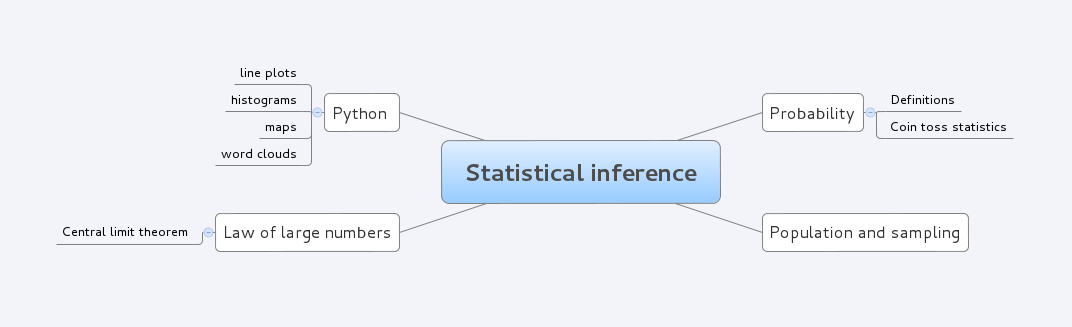

In [1]:
from IPython.core.display import Image 
Image(filename='plots/data-analysis-python.png') 

## Python 

* High level language 
* Free and open source
* Interactive environment
* Python is object-oriented
* Python is interpreted
* There are modules for almost anything in [scientific computation](http://www.scipy.org/)

Python is an easy to learn and, at same time, a very powerful programming language. Its power lies in the beautiful design and modularity of the language, which makes it very easy to use it for various applications. Here we will use python to plot the data in different forms so as to analyse it.

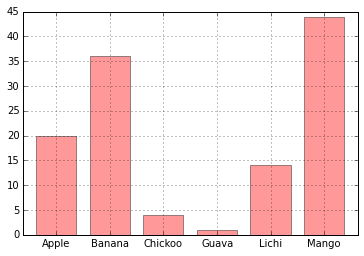

In [6]:
import pandas as pd

s = pd.Series({'Mango':44, 'Banana':36, 'Apple':20, 'Chickoo':4, 'Guava':1, 'Lichi':14})
s.plot(kind='bar', rot=0, color='red', alpha=0.4)

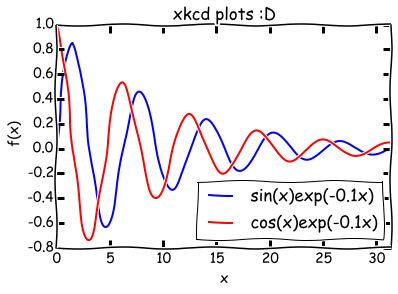

In [2]:
xkcd()
x = linspace(0, 10*pi, 256)
plot(x, sin(x)*exp(-0.1*x), label='sin(x)exp(-0.1x)')
plot(x, cos(x)*exp(-0.1*x), label='cos(x)exp(-0.1x)')

xlabel('x')
xlim([0, 10*pi])
ylabel(' f(x)')
legend(loc='lower right')
title('xkcd plots :D')

## Probability

Probability theory is common sense reduced to calculations- Laplace

In this section we will discuss some basics of the probability and then do the example of coin toss. So lets start by asking some question.

What is the probability that

* Chennai will win the IPL this year?
* the Sun will rise tomorrow?
* we get a head in a toss of a coin?


### Coin toss statistics

I flip a coin and then we assume that the probabilty of Heads is 1/2 if the coin is *fair*. 
If I looked at the coin then I know for sure if it is H or T and hence now the probability is 1. So my information has increased but u will still hope to get heads with a probability 1/2. And hence for a same process we have two probabilities.

Suppose if u toss a coin ten times and u end up getting 7 heads, what is the probability that the coin is fair?

We use the probability density function of Bayesian probability theory. A coin is tossed N times and the numbers of heads and tails respectively are observed in the experiment. Thus N = H+T.

The probability of obtaining heads in a single toss of the coin is r . Then we can use Bayes' theorem to calculate the posterior probability density of r conditional on H and T :

$$
f(r | H=h, T=t) = 
  \frac {\Pr(H=h | r, N=h+t) \, g(r)} {\int_0^1 \Pr(H=h |r, N=h+t) \, g(r) \, dr}. \!
$$

where g(r) is the prior probability density distribution of r and lies in the range 0 to 1. If we choose it to be unity, which means that r is uniformly distributed from [0, 1].


Then the probability is simply given by Binomial distribution which can then be used to calculate the posterior probability 

$$
f(r | H=h, T=t) = \frac{(N+1)!}{h!\,\,t!} \; r^h\,(1-r)^t. \!
$$


Taken from [wiki](https://en.wikipedia.org/wiki/Checking_whether_a_coin_is_fair).

The posterior probability that a coin is fair given u get 7 heads in 10 tosses is then 

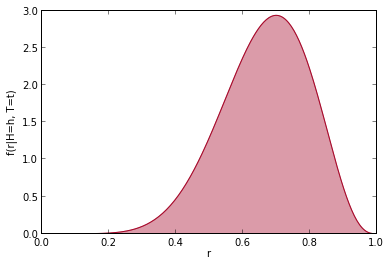

In [9]:
r = linspace(0, 1, 256)
h, t = 7, 3

p = 1320*r**h*(1-r)**t

plot(r, p, color="#A60628")
fill_between(r, p, color="#A60628", alpha=0.4)
xlabel('r')
ylabel('f(r|H=h, T=t)')

For coin to be fair, f should lie between 45%-55% 

$$
 \Pr(0.45 < r <0.55)
 = \int_{0.45}^{0.55} f(r | H=7, T=3) \,dr
 \approx 13\%
 \!
$$

This says that there is 13 % probablity that the coin is fair. The probability is small but not zero. Also, our choice of prior was very naive!
So lets redo the example of coin toss with different number of trials and see how does the Bayesain updation of probability works.




#### "When the facts change, I change my mind. What do you do, sir?" - John Maynard Keynes 




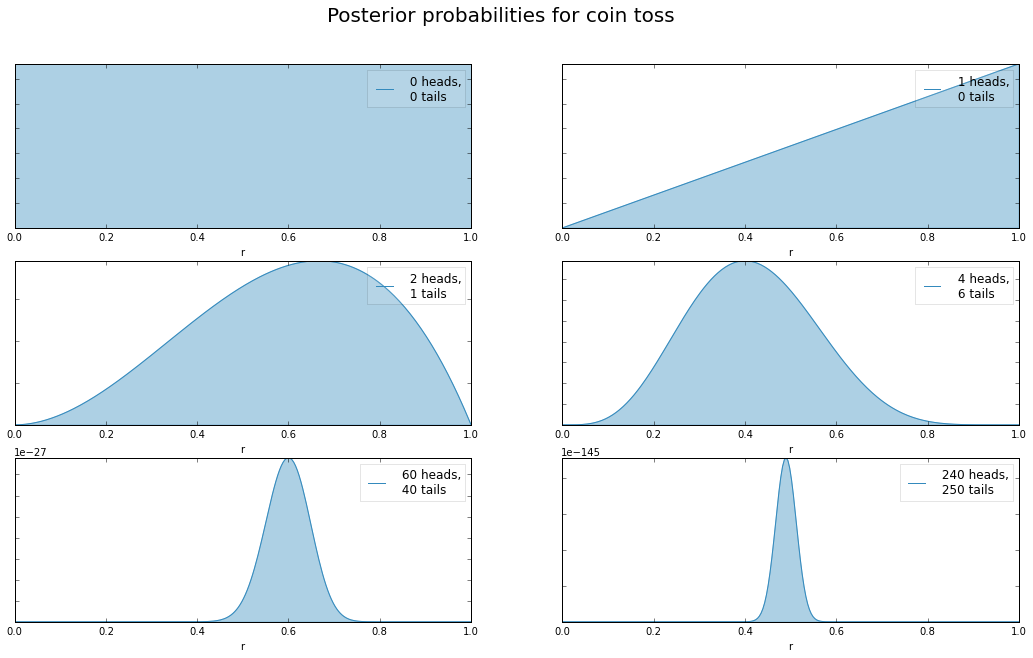

In [7]:
import matplotlib.pyplot as plt

r = linspace(0, 1, 256)
f = plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')

def posteriorPlot(h, t, n_):
    p = 1320*r**h*(1-r)**t
    sp = f.add_subplot(3, 2, n_ )  
    plt.plot(r, p, label=" %d heads,\n %d tails" % (h, t), color='#348ABD')
    plt.fill_between(r, p, color="#348ABD", alpha=0.4)
    plt.setp(sp.get_yticklabels(), visible=False)
    plt.xlabel('r')
    plt.axis([0, 1, 0, max(p)])
    leg = plt.legend(loc="upper right")
    leg.get_frame().set_alpha(0.1)

   
numbFrames = 6    
h = ([0, 1, 2, 4, 60, 240])
t = ([0, 0, 1, 6, 40, 250])

for i in range(numbFrames):
    posteriorPlot(h[i], t[i], i+1)

suptitle("Posterior probabilities for coin toss",fontsize=20);
# r is the probability of heads

Thus we see that our belif that the coin is fair increases with the data. This is the Bayesian update of the probability.



### Statistical inference
Statistical inference means making use of available informations for drawing conclusions (inferences) about the population from which the sample was taken

### Population
A population is the entire group we are interested in and wish to describe or draw conclusions about it. 

### Samples

To know about a population we take recourse to sampling.

A sample is a group of the larger group (the population). We draw valid conclusions about the larger group by studying the sample.

* Samples are group of observation drawn from a bigger population.
* All this effort is to know about a bigger population based on sample.


Sampling is a very important step as it involves inference from the data. If the distribution of the population is multimodal then based on the choice of data set, one can end up getting different results. Like the famous example of a certain accident where the number of people died in road accident was more on the roadside than on the middle of the road. Now this sample will not imply that walking in the middle of the road is safer than walking on the footpath!

The true value of population can  only reached if one takes a [bigger sample size](http://nbviewer.ipython.org/github/rajeshrinet/compPhy/blob/master/Notebooks/CentralLimitTheorem.ipynb) or choice of the sample is done sensibly. In some cases, one may need to do further transformation to learn from the data which may not be very obvious from the raw data. The raw data may not have a pattern while after the tranformation the pattern in the data is obvious! 

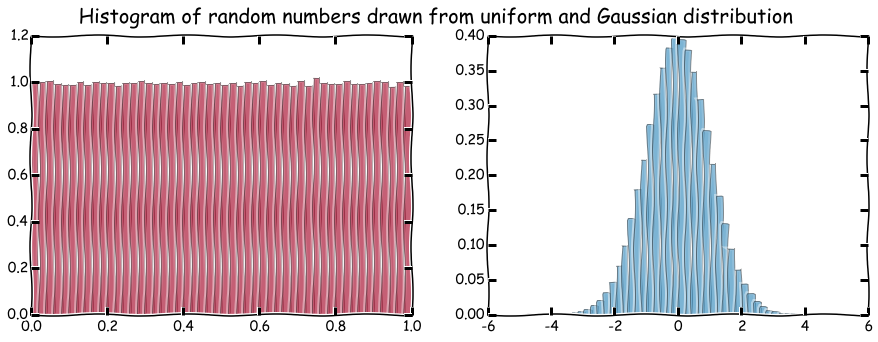

In [11]:
xkcd()
# hist a set of random numbers, Gaussian distributed
import numpy as np
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

N = 1000000
x = np.random.random(N)
ax1.hist(x,50, normed=True, color='#A60628', alpha=0.4);

x = np.random.randn(N)
ax2.hist(x,50, normed=True, color='#348ABD', alpha=0.4);

suptitle("Histogram of random numbers drawn from uniform and Gaussian distribution",fontsize=20);


### Mean
Mean is the average of the whole data set and usually the first thing that we want to know about the data.


E.g.- Average marks of students in a class.


### Standard deviation
How much does the values differ from the mean.


Eq: Standard deviation of marks of the student about the mean. Again based on the standard deviation u can guess your grade!

In [12]:
from IPython.display import HTML
HTML('<iframe src=http://www.mathsisfun.com/data/images/normal-distribution-2.gif width=300 height=180></iframe>')

### Multi-modal distributions

Suppose u have to organise a Marathon then number of people and you want to make T-shirts for them. The the number of T-shirts you need may be calculated by looking at the previous years data and taking a mean of that. 
But if you want to arrange for people at the finishing line on the marathon day. Then a mere mean of the distribution may land you in trouble.
Lets say that the mean time people take to finish themarathon is 200 minutes. So you thought that lets start arranging peopel from 1670-230 minutes. But once u go tht field, u see that there has been people as early as 100 minutes. This is an example of multimodal distribution and you have to account for this. 

This example has been taken from the book 'Gnuplot in Action' by Philipp K. Janert.


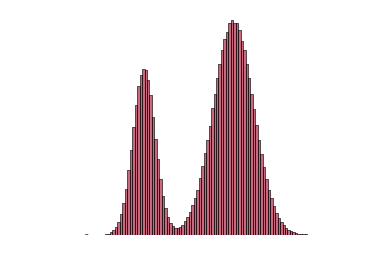

In [3]:
import numpy as np
N = 2000000;


x = np.random.randn(N)
y  = x*1.82 + 8
xx = x*0

for i in range(N):
    if np.random.random(1) < 0.3:
        xx[i] = x[i]
    else:
        xx[i] = y[i]
    
hist(xx, 100, normed=True, color='#A60628', alpha=0.6);
axis('off');

### Transformation of data

In many cases analysing the raw data may not give you insights. And L. N. Trefethen says:


#### The purpose of computing is insight, not pictures.


In these cases, a transformation is necessary. The most common example is the log return!

So we take the finance data of the IBM from [here](https://in.finance.yahoo.com/q/hp?s=IBM&a=00&b=2&c=1962&d=04&e=4&f=2014&g=d) and then plot the close value.  

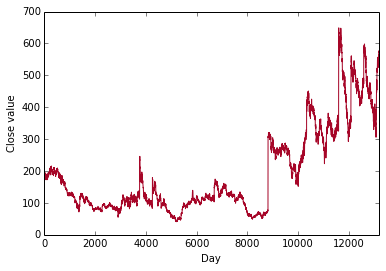

In [5]:
data = np.loadtxt('plots/ibm.csv', skiprows=1, delimiter=',', usecols=(4, ))
N = len(data)

plot(range(N), data, color="#A60628")
xlim([0, len(data)]);
xlabel('Day');
ylabel('Close value');

### Invoking log return

Now it is fairly complicate to make sense of this data, but if we do this tranformation which is called the log return, we start to make sense of this data.

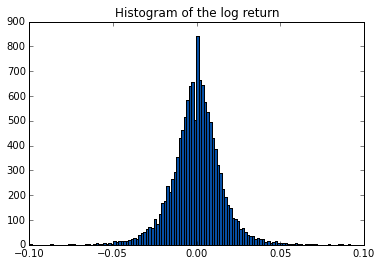

In [9]:
renorm = zeros(N-1);
for i in range(N-1):
    renorm[i] = log( data[i+1]/data[i] );
   
title('Histogram of the log return');
hist(renorm, 1000, color='#0650a6');
xlim([-0.1, 0.1]);

## More plotting

### Word clouds
This section is to illustrate some more plotting techniques using matplotlib which may be used for visualisation of data on the world map and as a word map! We have used python again to draw [word clouds](https://github.com/amueller/word_cloud). We have used the data collected in the first class to make the word cloud. 

Below is the depiction of people whom the students considered their source of inspiration.

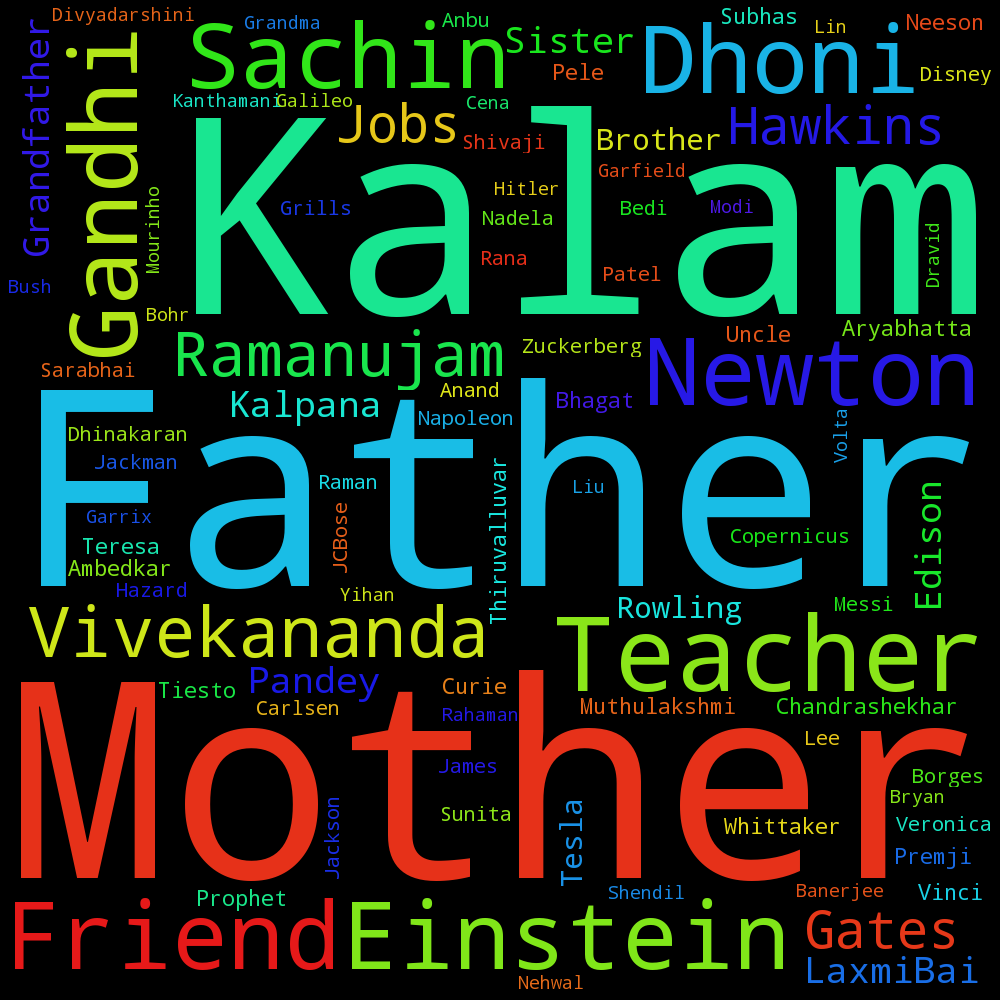

In [3]:
from IPython.core.display import Image 
Image(filename='plots/inspire.png') 

### World maps
In the last picture we show how to make basemaps in python which can be then used to visualise data on a map. Also, we can make a 
rotating globe using this by putting the codes in a for loop and change the angle (latitude and longitude). I will leave this as an exercise, for the readers!

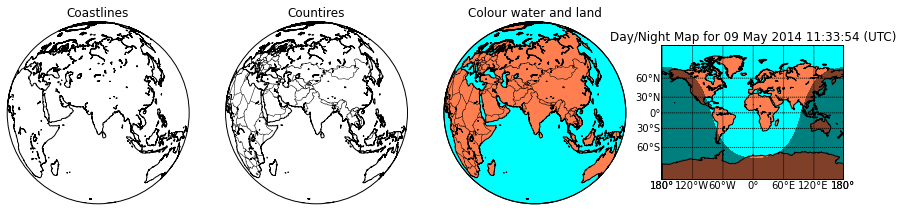

In [1]:
from mpl_toolkits.basemap import Basemap
from datetime import datetime

figure(num=None, figsize=(15, 10), dpi=150, facecolor='w', edgecolor='k')
map = Basemap(projection='ortho', lat_0=22, lon_0=77, resolution='l', area_thresh=1000);

subplot(141)                          # Draw just the coast lines
map.drawcoastlines();    
title('Coastlines')

subplot(142)                          # Add countries
map.drawcoastlines( )
map.drawcountries( )
title('Countires')

subplot(143)                          # Add different colours for land and water
map.drawcoastlines(  )
map.drawcountries( )
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')
title('Colour water and land')

subplot(144)                         # Day and night at this time
map = Basemap(projection='mill',lon_0=0)
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
date = datetime.utcnow()
CS=map.nightshade(date)
title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))

show()